# Multi-Source Agentic RAG - Tool Testing Notebook

This notebook tests all tools individually before integrating them into the modular codebase.

**Architecture based on:** `1-AgenticRAG_langraph.ipynb`

## 1. Setup and Configuration

In [22]:
import os
from dotenv import load_dotenv

# Load environment variables
load_dotenv()

os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")
print("✓ Environment loaded")

✓ Environment loaded


## 2. Test LLM Connection

In [2]:
from langchain_groq import ChatGroq

llm = ChatGroq(model="llama-3.1-8b-instant", temperature=0)
response = llm.invoke("Hello! Say hi in one sentence.")
print(response.content)
print("\n✓ LLM connection working")

c:\Agentic_AI_Projects\Multi_source_tool_retriever_using_langgraph\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Hello, it's nice to meet you, how can I assist you today?

✓ LLM connection working


## 3. Test URL Retriever Tool

In [23]:
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import FAISS
from langchain_huggingface import HuggingFaceEmbeddings
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_core.tools.retriever import create_retriever_tool

# Configuration
URLS = [
    "https://langchain-ai.github.io/langgraph/tutorials/introduction/",
    "https://langchain-ai.github.io/langgraph/tutorials/workflows/",
    "https://langchain-ai.github.io/langgraph/how-tos/map-reduce/"
]

# Load documents from URLs
print("Loading URLs...")
docs_list = []
for url in URLS:
    try:
        docs = WebBaseLoader(url).load()
        docs_list.extend(docs)
        print(f"✓ Loaded: {url}")
    except Exception as e:
        print(f"✗ Failed: {url} - {e}")

# Split documents
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000,
    chunk_overlap=100
)
doc_splits = text_splitter.split_documents(docs_list)
print(f"\n✓ Created {len(doc_splits)} document chunks")

# Create vector store
print("\nCreating vector store...")
vectorstore = FAISS.from_documents(
    documents=doc_splits,
    embedding=HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
)
retriever = vectorstore.as_retriever(search_kwargs={"k": 4})

# Create retriever tool
url_retriever_tool = create_retriever_tool(
    retriever,
    "langgraph_docs_search",
    "Search for information about LangGraph. Use this for questions about LangGraph concepts, tutorials, and features."
)

# Test retrieval
test_docs = retriever.invoke("what is langgraph")
print(f"\n✓ URL Retriever Tool created")
print(f"✓ Test retrieval returned {len(test_docs)} documents")

USER_AGENT environment variable not set, consider setting it to identify your requests.


Loading URLs...
✓ Loaded: https://langchain-ai.github.io/langgraph/tutorials/introduction/
✓ Loaded: https://langchain-ai.github.io/langgraph/tutorials/workflows/
✓ Loaded: https://langchain-ai.github.io/langgraph/how-tos/map-reduce/

✓ Created 3 document chunks

Creating vector store...

✓ URL Retriever Tool created
✓ Test retrieval returned 3 documents


## 4. Test PDF Retriever Tool

In [24]:
from pathlib import Path
from langchain_community.document_loaders import PyPDFLoader

PDF_PATH = Path("data/Agent Quality Whitepaper.pdf")

if PDF_PATH.exists():
    # Load PDF
    print(f"Loading PDF: {PDF_PATH}")
    loader = PyPDFLoader(str(PDF_PATH))
    pdf_docs = loader.load()
    print(f"✓ Loaded {len(pdf_docs)} pages")
    
    # Split documents
    text_splitter = RecursiveCharacterTextSplitter(
        chunk_size=1000,
        chunk_overlap=100
    )
    pdf_splits = text_splitter.split_documents(pdf_docs)
    print(f"✓ Created {len(pdf_splits)} chunks")
    
    # Create vector store
    pdf_vectorstore = FAISS.from_documents(
        documents=pdf_splits,
        embedding=HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
    )
    pdf_retriever = pdf_vectorstore.as_retriever(search_kwargs={"k": 4})
    
    # Create tool
    pdf_retriever_tool = create_retriever_tool(
        pdf_retriever,
        "pdf_search",
        "Search the Agent Quality Whitepaper PDF. Use for questions about agent quality."
    )
    
    # Test
    test_pdf = pdf_retriever.invoke("agent quality")
    print(f"\n✓ PDF Retriever Tool created")
    print(f"✓ Test retrieval returned {len(test_pdf)} documents")
else:
    print(f"✗ PDF not found: {PDF_PATH}")
    pdf_retriever_tool = None

Loading PDF: data\Agent Quality Whitepaper.pdf
✓ Loaded 51 pages
✓ Created 98 chunks

✓ PDF Retriever Tool created
✓ Test retrieval returned 4 documents


## 5. Test Text File Retriever Tool

In [25]:
from langchain_community.document_loaders import TextLoader

TEXT_PATH = Path("data/about_me.txt")

if TEXT_PATH.exists():
    # Load text file
    print(f"Loading text file: {TEXT_PATH}")
    loader = TextLoader(str(TEXT_PATH))
    text_docs = loader.load()
    print(f"✓ Loaded text file")
    
    # Split documents
    text_splitter = RecursiveCharacterTextSplitter(
        chunk_size=1000,
        chunk_overlap=100
    )
    text_splits = text_splitter.split_documents(text_docs)
    print(f"✓ Created {len(text_splits)} chunks")
    
    # Create vector store
    text_vectorstore = FAISS.from_documents(
        documents=text_splits,
        embedding=HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
    )
    text_retriever = text_vectorstore.as_retriever(search_kwargs={"k": 4})
    
    # Create tool
    text_retriever_tool = create_retriever_tool(
        text_retriever,
        "about_abhiram_search",
        "Search information about Abhiram. Use for questions about Abhiram's background, experience, or profile."
    )
    
    # Test
    test_text = text_retriever.invoke("abhiram")
    print(f"\n✓ Text Retriever Tool created")
    print(f"✓ Test retrieval returned {len(test_text)} documents")
else:
    print(f"✗ Text file not found: {TEXT_PATH}")
    text_retriever_tool = None

Loading text file: data\about_me.txt
✓ Loaded text file
✓ Created 2 chunks

✓ Text Retriever Tool created
✓ Test retrieval returned 2 documents


## 6. Test Wikipedia Tool

In [26]:
from langchain_community.tools import WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper

try:
    wikipedia_wrapper = WikipediaAPIWrapper(
        top_k_results=1,
        doc_content_chars_max=500
    )
    wikipedia_tool = WikipediaQueryRun(api_wrapper=wikipedia_wrapper)
    
    # Test
    test_result = wikipedia_tool.invoke("Python programming")
    print("✓ Wikipedia Tool created")
    print(f"✓ Test query returned: {test_result[:100]}...")
except Exception as e:
    print(f"✗ Wikipedia tool failed: {e}")
    wikipedia_tool = None

✓ Wikipedia Tool created
✓ Test query returned: Page: Python (programming language)
Summary: Python is a high-level, general-purpose programming lan...


## 7. Test Arxiv Tool

In [27]:
from langchain_community.tools import ArxivQueryRun
from langchain_community.utilities import ArxivAPIWrapper

try:
    arxiv_wrapper = ArxivAPIWrapper(
        top_k_results=1,
        doc_content_chars_max=500
    )
    arxiv_tool = ArxivQueryRun(api_wrapper=arxiv_wrapper)
    
    # Test
    test_result = arxiv_tool.invoke("machine learning")
    print("✓ Arxiv Tool created")
    print(f"✓ Test query returned: {test_result[:100]}...")
except Exception as e:
    print(f"✗ Arxiv tool failed: {e}")
    arxiv_tool = None

✓ Arxiv Tool created
✓ Test query returned: Published: 2023-06-07
Title: Changing Data Sources in the Age of Machine Learning for Official Stati...


## 8. Test DuckDuckGo Search Tool

In [28]:
from langchain_community.tools import DuckDuckGoSearchRun

try:
    duckduckgo_tool = DuckDuckGoSearchRun()
    
    # Test
    test_result = duckduckgo_tool.invoke("latest AI news")
    print("✓ DuckDuckGo Tool created")
    print(f"✓ Test query returned: {test_result[:100]}...")
except Exception as e:
    print(f"✗ DuckDuckGo tool failed: {e}")
    duckduckgo_tool = None

✓ DuckDuckGo Tool created
✓ Test query returned: Subscribe now to get all our premium content and latest tech news delivered straight to your inbox ....


## 9. Create Tools List

In [29]:
# Collect all working tools
tools = [
    url_retriever_tool,
    pdf_retriever_tool,
    text_retriever_tool,
    wikipedia_tool,
    arxiv_tool,
    duckduckgo_tool
]

# Filter out None values
tools = [t for t in tools if t is not None]

print(f"\n{'='*60}")
print(f"Total working tools: {len(tools)}")
print(f"{'='*60}")
for i, tool in enumerate(tools, 1):
    print(f"{i}. {tool.name}")


Total working tools: 6
1. langgraph_docs_search
2. pdf_search
3. about_abhiram_search
4. wikipedia
5. arxiv
6. duckduckgo_search


In [16]:
from typing import Annotated, Sequence
from typing_extensions import TypedDict

from langchain_core.messages import BaseMessage
from langgraph.graph.message import add_messages


class AgentState(TypedDict):
    # The add_messages function defines how an update should be processed
    # Default is to replace. add_messages says "append"
    messages: Annotated[Sequence[BaseMessage], add_messages]

In [19]:
from langchain_groq import ChatGroq

llm=ChatGroq(model="llama-3.1-8b-instant")
llm.invoke("Hey there")

AIMessage(content="It's nice to meet you. Is there something I can help you with or would you like to chat?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 23, 'prompt_tokens': 37, 'total_tokens': 60, 'completion_time': 0.028244747, 'completion_tokens_details': None, 'prompt_time': 0.001718573, 'prompt_tokens_details': None, 'queue_time': 0.054048976, 'total_time': 0.02996332}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_f757f4b0bf', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c03a1-d3d5-7981-bd5d-4208b2707674-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 37, 'output_tokens': 23, 'total_tokens': 60})

In [34]:
def agent(state):
    """
    Invokes the agent model to generate a response based on the current state. Given
    the question, it will decide to retrieve using the retriever tool, or simply end.

    Args:
        state (messages): The current state

    Returns:
        dict: The updated state with the agent response appended to messages
    """
    print("---CALL AGENT---")
    messages = state["messages"]
    model = ChatGroq(model="llama-3.1-8b-instant")
    model = model.bind_tools(tools)
    response = model.invoke(messages)
    # We return a list, because this will get added to the existing list
    return {"messages": [response]}

In [35]:
from typing import Annotated, Literal, Sequence
from typing_extensions import TypedDict

#from langchain import hub
from langchain_core.messages import BaseMessage, HumanMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate
from langchain_openai import ChatOpenAI

from pydantic import BaseModel, Field

In [36]:
### Edges
def grade_documents(state) -> Literal["generate", "rewrite"]:
    """
    Determines whether the retrieved documents are relevant to the question.
    Args:
        state (messages): The current state
    Returns:
        str: A decision for whether the documents are relevant or not
    """
    print("---CHECK RELEVANCE---")
    # Data model
    class grade(BaseModel):
        """Binary score for relevance check."""
        binary_score: str = Field(description="Relevance score 'yes' or 'no'")

    # LLM
    model = ChatGroq(model="llama-3.1-8b-instant")

    # LLM with tool and validation
    llm_with_tool = model.with_structured_output(grade)

    # Prompt
    prompt = PromptTemplate(
        template="""You are a grader assessing relevance of a retrieved document to a user question. \n 
        Here is the retrieved document: \n\n {context} \n\n
        Here is the user question: {question} \n
        If the document contains keyword(s) or semantic meaning related to the user question, grade it as relevant. \n
        Give a binary score 'yes' or 'no' score to indicate whether the document is relevant to the question.""",
        input_variables=["context", "question"],
    )

    # Chain
    chain = prompt | llm_with_tool

    messages = state["messages"]
    last_message = messages[-1]

    question = messages[0].content
    docs = last_message.content

    scored_result = chain.invoke({"question": question, "context": docs})

    score = scored_result.binary_score

    if score == "yes":
        print("---DECISION: DOCS RELEVANT---")
        return "generate"

    else:
        print("---DECISION: DOCS NOT RELEVANT---")
        print(score)
        return "rewrite"


In [37]:
def generate(state):
    """
    Generate answer

    Args:
        state (messages): The current state

    Returns:
         dict: The updated message
    """
    print("---GENERATE---")
    messages = state["messages"]
    question = messages[0].content
    last_message = messages[-1]

    docs = last_message.content

    # Prompt
    prompt = PromptTemplate(
        template="""You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.

Question: {question}

Context: {context}

Answer:""",
        input_variables=["question", "context"],
    )

    # LLM
    llm = ChatGroq(model="llama-3.1-8b-instant", temperature=0)

    # Chain
    rag_chain = prompt | llm | StrOutputParser()

    # Run
    response = rag_chain.invoke({"context": docs, "question": question})
    return {"messages": [response]}

In [38]:
def rewrite(state):
    """
    Transform the query to produce a better question.

    Args:
        state (messages): The current state

    Returns:
        dict: The updated state with re-phrased question
    """

    print("---TRANSFORM QUERY---")
    messages = state["messages"]
    question = messages[0].content

    msg = [
        HumanMessage(
            content=f""" \n 
    Look at the input and try to reason about the underlying semantic intent / meaning. \n 
    Here is the initial question:
    \n ------- \n
    {question} 
    \n ------- \n
    Formulate an improved question: """,
        )
    ]

    # Grader
    model = ChatGroq(model="llama-3.1-8b-instant")
    response = model.invoke(msg)
    return {"messages": [response]}

In [39]:
# Collect all working tools
tools = [
    url_retriever_tool,
    pdf_retriever_tool,
    text_retriever_tool,
    wikipedia_tool,
    arxiv_tool,
    duckduckgo_tool
]


In [40]:
from langgraph.graph import END, StateGraph, START
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

# Define a new graph
workflow = StateGraph(AgentState)

# Define the nodes we will cycle between
workflow.add_node("agent", agent)  # agent
retrieve = ToolNode([url_retriever_tool,pdf_retriever_tool,text_retriever_tool,wikipedia_tool,arxiv_tool,duckduckgo_tool])
workflow.add_node("retrieve", retrieve)  # retrieval
workflow.add_node("rewrite", rewrite)  # Re-writing the question
workflow.add_node(
    "generate", generate
)  # Generating a response after we know the documents are relevant
# Call agent node to decide to retrieve or not
workflow.add_edge(START, "agent")

# Decide whether to retrieve
workflow.add_conditional_edges(
    "agent",
    # Assess agent decision
    tools_condition,
    {
        # Translate the condition outputs to nodes in our graph
        "tools": "retrieve",
        END: END,
    },
)

# Edges taken after the `action` node is called.
workflow.add_conditional_edges(
    "retrieve",
    # Assess agent decision
    grade_documents,
)
workflow.add_edge("generate", END)
workflow.add_edge("rewrite", "agent")

# Compile
graph = workflow.compile()

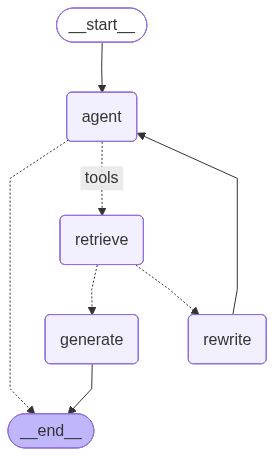

In [41]:
from IPython.display import Image, display
display(Image(graph.get_graph(xray=True).draw_mermaid_png()))

In [42]:
graph.invoke({"messages":"What is machine learning"})

---CALL AGENT---


{'messages': [HumanMessage(content='What is machine learning', additional_kwargs={}, response_metadata={}, id='33e304e6-5e63-47f9-a1a9-d55e2c8d7c67'),
  AIMessage(content='<arxiv>{"query": "machine learning"}</arxiv>', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 806, 'total_tokens': 821, 'completion_time': 0.023632126, 'completion_tokens_details': None, 'prompt_time': 0.049264992, 'prompt_tokens_details': None, 'queue_time': 0.054847872, 'total_time': 0.072897118}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_f757f4b0bf', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c03af-e988-7873-9627-7c5aee6dd9f6-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 806, 'output_tokens': 15, 'total_tokens': 821})]}